In [21]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Flatten,Dense
import matplotlib.pyplot as plt

In [2]:
#fashion_mnist = keras.datasets.fashion_mnist

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()
convert("Downloads/train-images-idx3-ubyte", "Downloads/train-labels-idx1-ubyte",
        "mnist_train.csv", 60000)
convert("Downloads/t10k-images-idx3-ubyte", "Downloads/t10k-labels-idx1-ubyte",
        "mnist_test.csv", 10000)

In [4]:
train=pd.read_csv('mnist_train.csv')
test=pd.read_csv('mnist_test.csv')
train.rename(columns={'5':'label'}, inplace=True)
test.rename(columns={'7':'label'}, inplace=True)

In [5]:
train1 =np.array(train,dtype ='float32')
test1=np.array(test,dtype = 'float32')

In [6]:
x_train=train1[:,1:]/255
y_train= train1[:,0]

In [7]:
x_test= test1[:,1:]/255
y_test=test1[:,0]

In [8]:
xval,xtrain=x_train[:5000],x_train[5000:]

In [9]:
yval,ytrain=y_train[:5000],y_train[5000:]

In [10]:
xtrain =xtrain.reshape(xtrain.shape[0],*(28,28))
xtest = x_test.reshape(x_test.shape[0],*(28,28))
xval = xval.reshape(xval.shape[0],*(28,28))

In [11]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [12]:
ytrain=ytrain.astype(int)
#i gotta thing to do

In [13]:
model = keras.models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(300, activation='relu'),
  Dense(100,activation='relu'),
  Dense(10, activation='softmax')
])

In [14]:
model.layers[1].get_weights()

[array([[ 0.02545799,  0.02803643, -0.04391672, ..., -0.04665408,
          0.02182323, -0.05398278],
        [ 0.06097394, -0.03592008,  0.02682311, ...,  0.03492676,
         -0.07348014,  0.06790528],
        [-0.00218903, -0.04364266, -0.00220013, ...,  0.01497683,
          0.05356516, -0.02780284],
        ...,
        [-0.07204891, -0.02732924,  0.01600265, ...,  0.05130145,
         -0.04545949, -0.05586493],
        [-0.0060067 , -0.06917991,  0.03448102, ...,  0.0718693 ,
          0.01180729, -0.01063372],
        [ 0.06177534,  0.05893485,  0.02857781, ..., -0.06412988,
         -0.03178391,  0.03614879]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [16]:
history=model.fit(xtrain,ytrain,epochs=30,validation_data=(xval,yval))

Train on 54999 samples, validate on 5000 samples
Epoch 1/30
54999/54999 [==============================] - 9s 155us/sample - loss: 0.7129 - accuracy: 0.7672 - val_loss: 0.5003 - val_accuracy: 0.8280
Epoch 2/30
54999/54999 [==============================] - 7s 128us/sample - loss: 0.4879 - accuracy: 0.8293 - val_loss: 0.4579 - val_accuracy: 0.8414
Epoch 3/30
54999/54999 [==============================] - 7s 125us/sample - loss: 0.4426 - accuracy: 0.8442 - val_loss: 0.4072 - val_accuracy: 0.8608
Epoch 4/30
54999/54999 [==============================] - 7s 136us/sample - loss: 0.4138 - accuracy: 0.8542 - val_loss: 0.3961 - val_accuracy: 0.8624
Epoch 5/30
54999/54999 [==============================] - 9s 171us/sample - loss: 0.3943 - accuracy: 0.8607 - val_loss: 0.3926 - val_accuracy: 0.8598
Epoch 6/30
54999/54999 [==============================] - 12s 219us/sample - loss: 0.3782 - accuracy: 0.8655 - val_loss: 0.3614 - val_accuracy: 0.8726
Epoch 7/30
54999/54999 [==========================

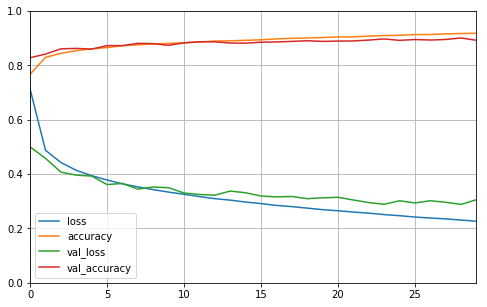

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
model.evaluate(xtest,y_test)

9999/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34137042899085995, 0.8807881]

In [33]:
pred=(model.predict(xtest[0:3]))

In [34]:
pred.round(2)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
pred1=model.predict_classes(xtest[0:3])

In [39]:
pred1

array([2, 1, 1])

In [40]:
np.array(class_names)[pred1]

array(['Pullover', 'Trouser', 'Trouser'], dtype='<U11')

In [42]:
y_test[0:3]

array([2., 1., 1.], dtype=float32)